# Sensitivity Analysis for Bandit OPE

When ignorability may fail, sensitivity analysis reports partial-identification
bounds across a range of confounding strengths.

In [1]:
from __future__ import annotations

from pathlib import Path

import numpy as np
import pandas as pd

from crl.assumptions import AssumptionSet
from crl.assumptions_catalog import (
    BOUNDED_CONFOUNDING,
    OVERLAP,
    SEQUENTIAL_IGNORABILITY,
)
from crl.benchmarks.bandit_synth import SyntheticBandit, SyntheticBanditConfig
from crl.estimands.policy_value import PolicyValueEstimand
from crl.sensitivity import (
    BanditPropensitySensitivity,
    SensitivityBounds,
    SensitivityCurve,
)
from crl.sensitivity.bandits import sensitivity_bounds
from crl.viz import configure_notebook_display, save_figure
from crl.viz.plots import plot_sensitivity_curve

In [2]:
np.random.seed(0)
configure_notebook_display()

benchmark = SyntheticBandit(SyntheticBanditConfig(seed=10))
dataset = benchmark.sample(num_samples=1_500, seed=11)

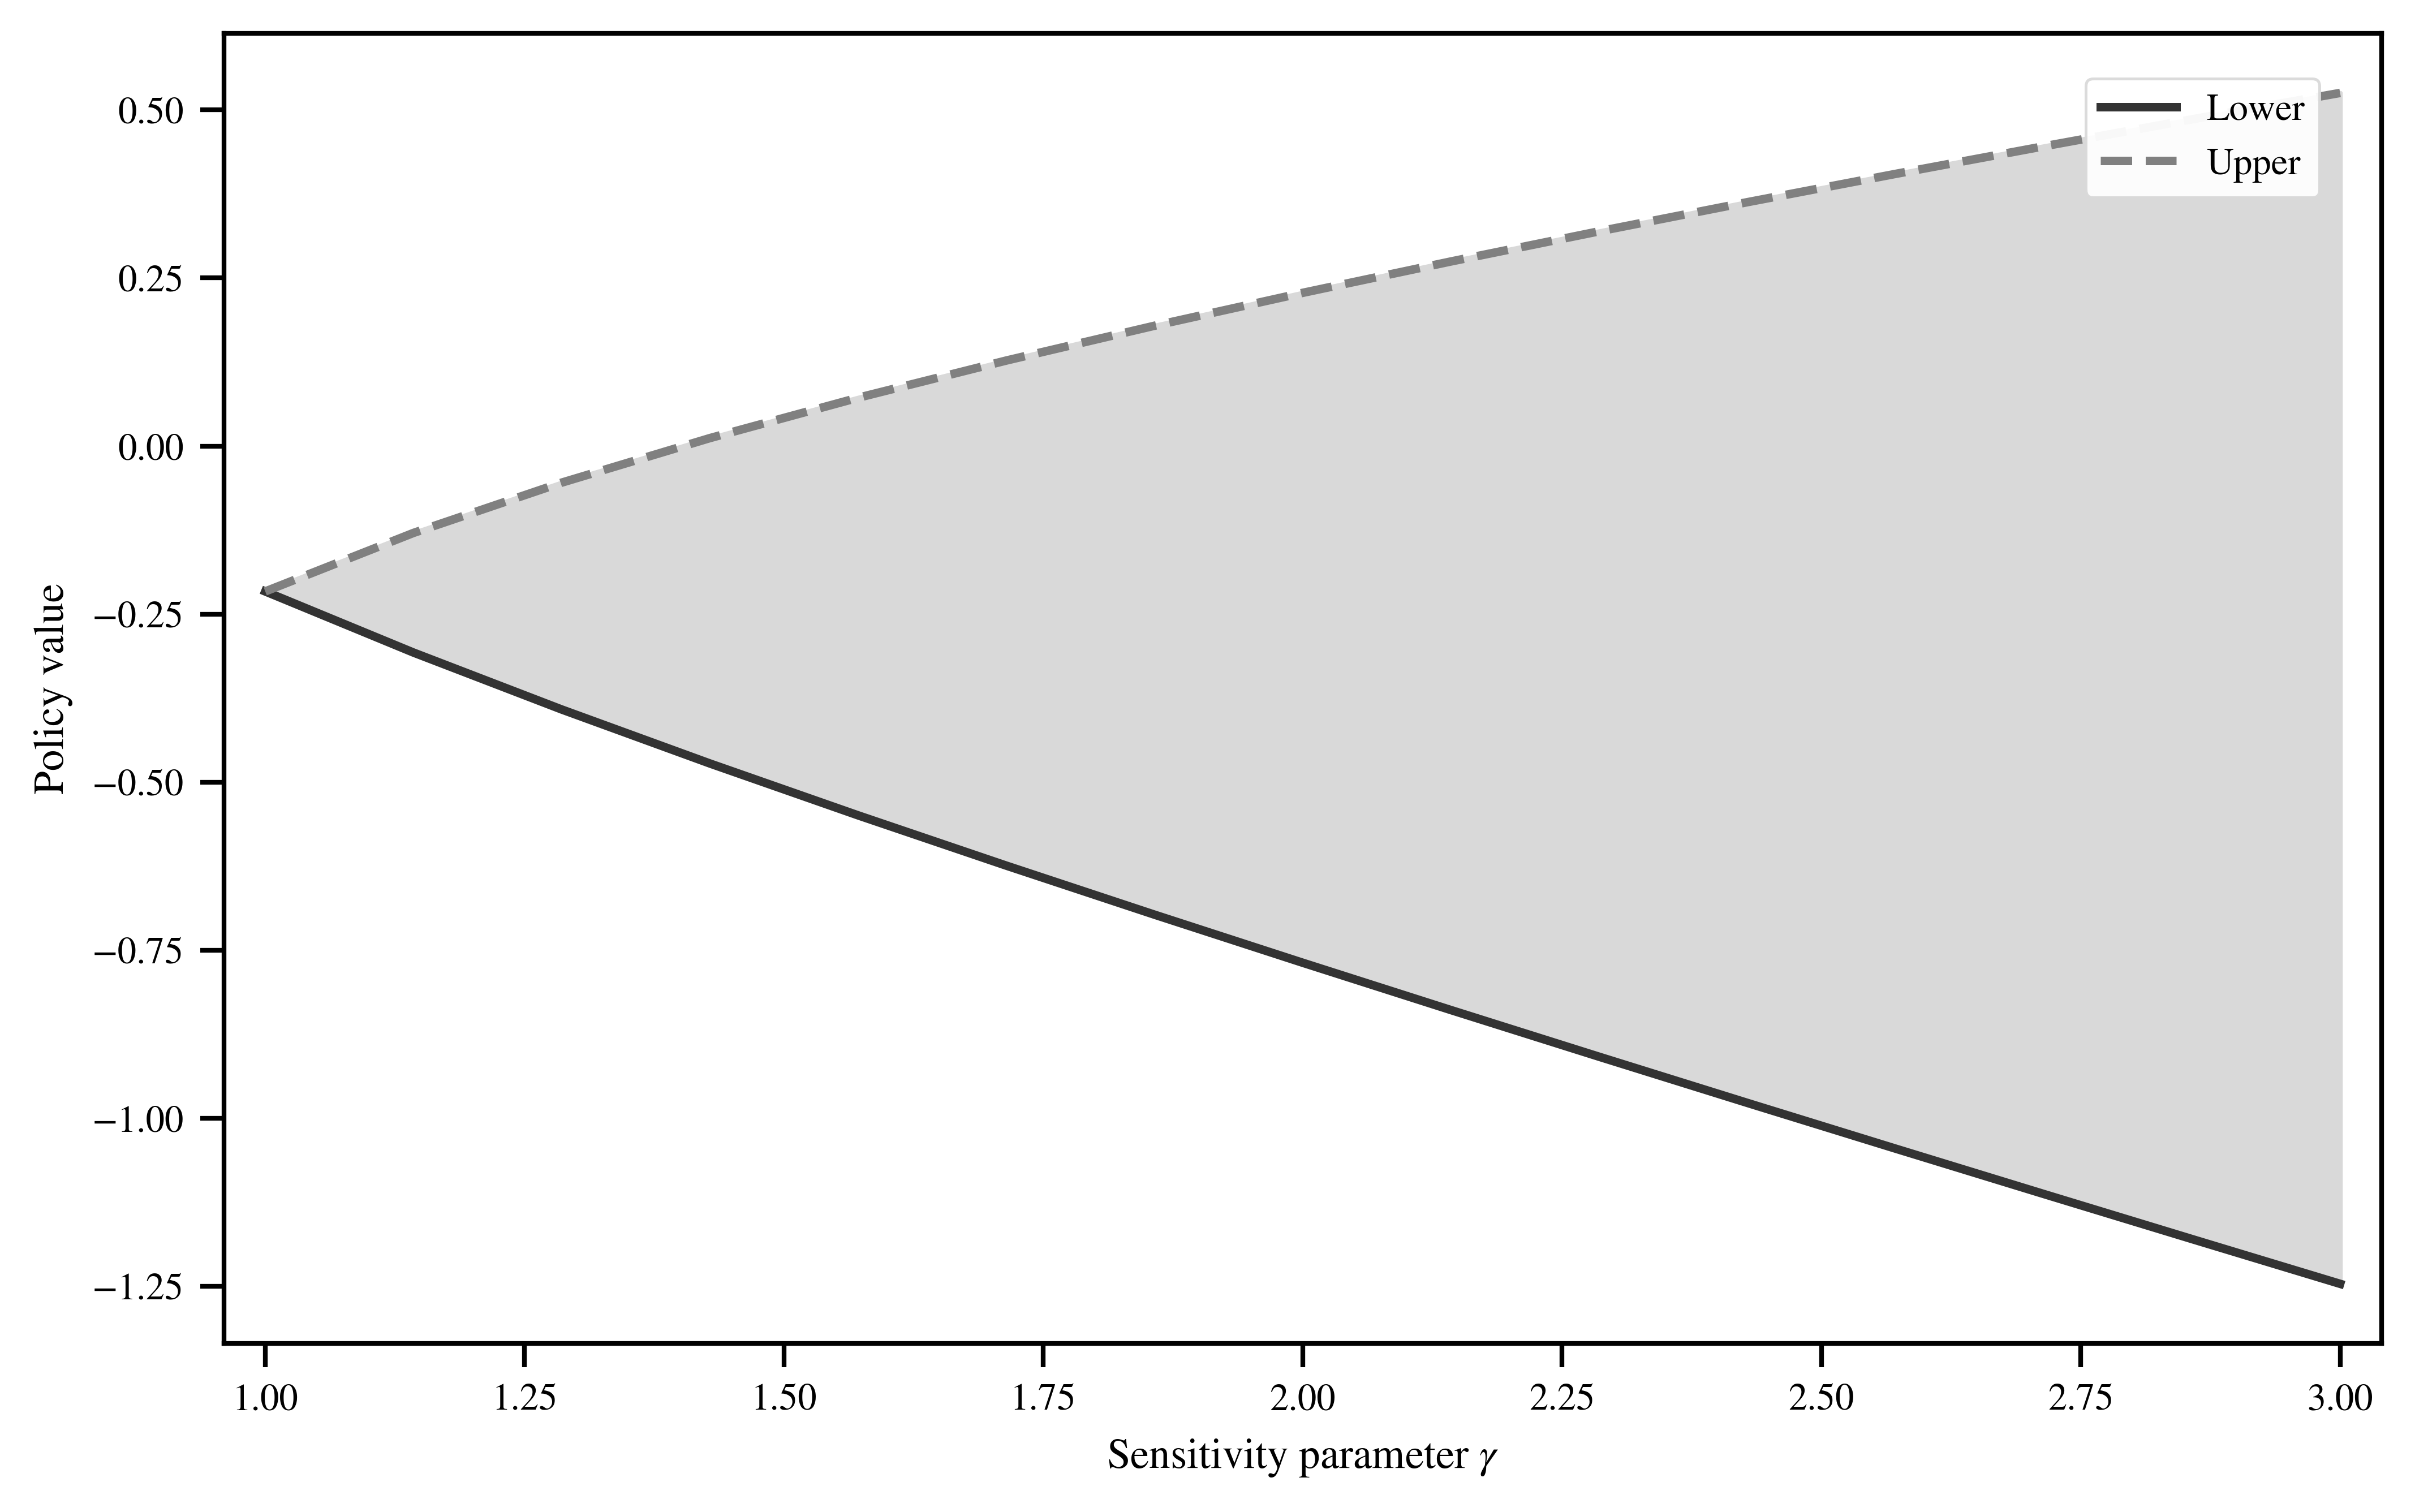

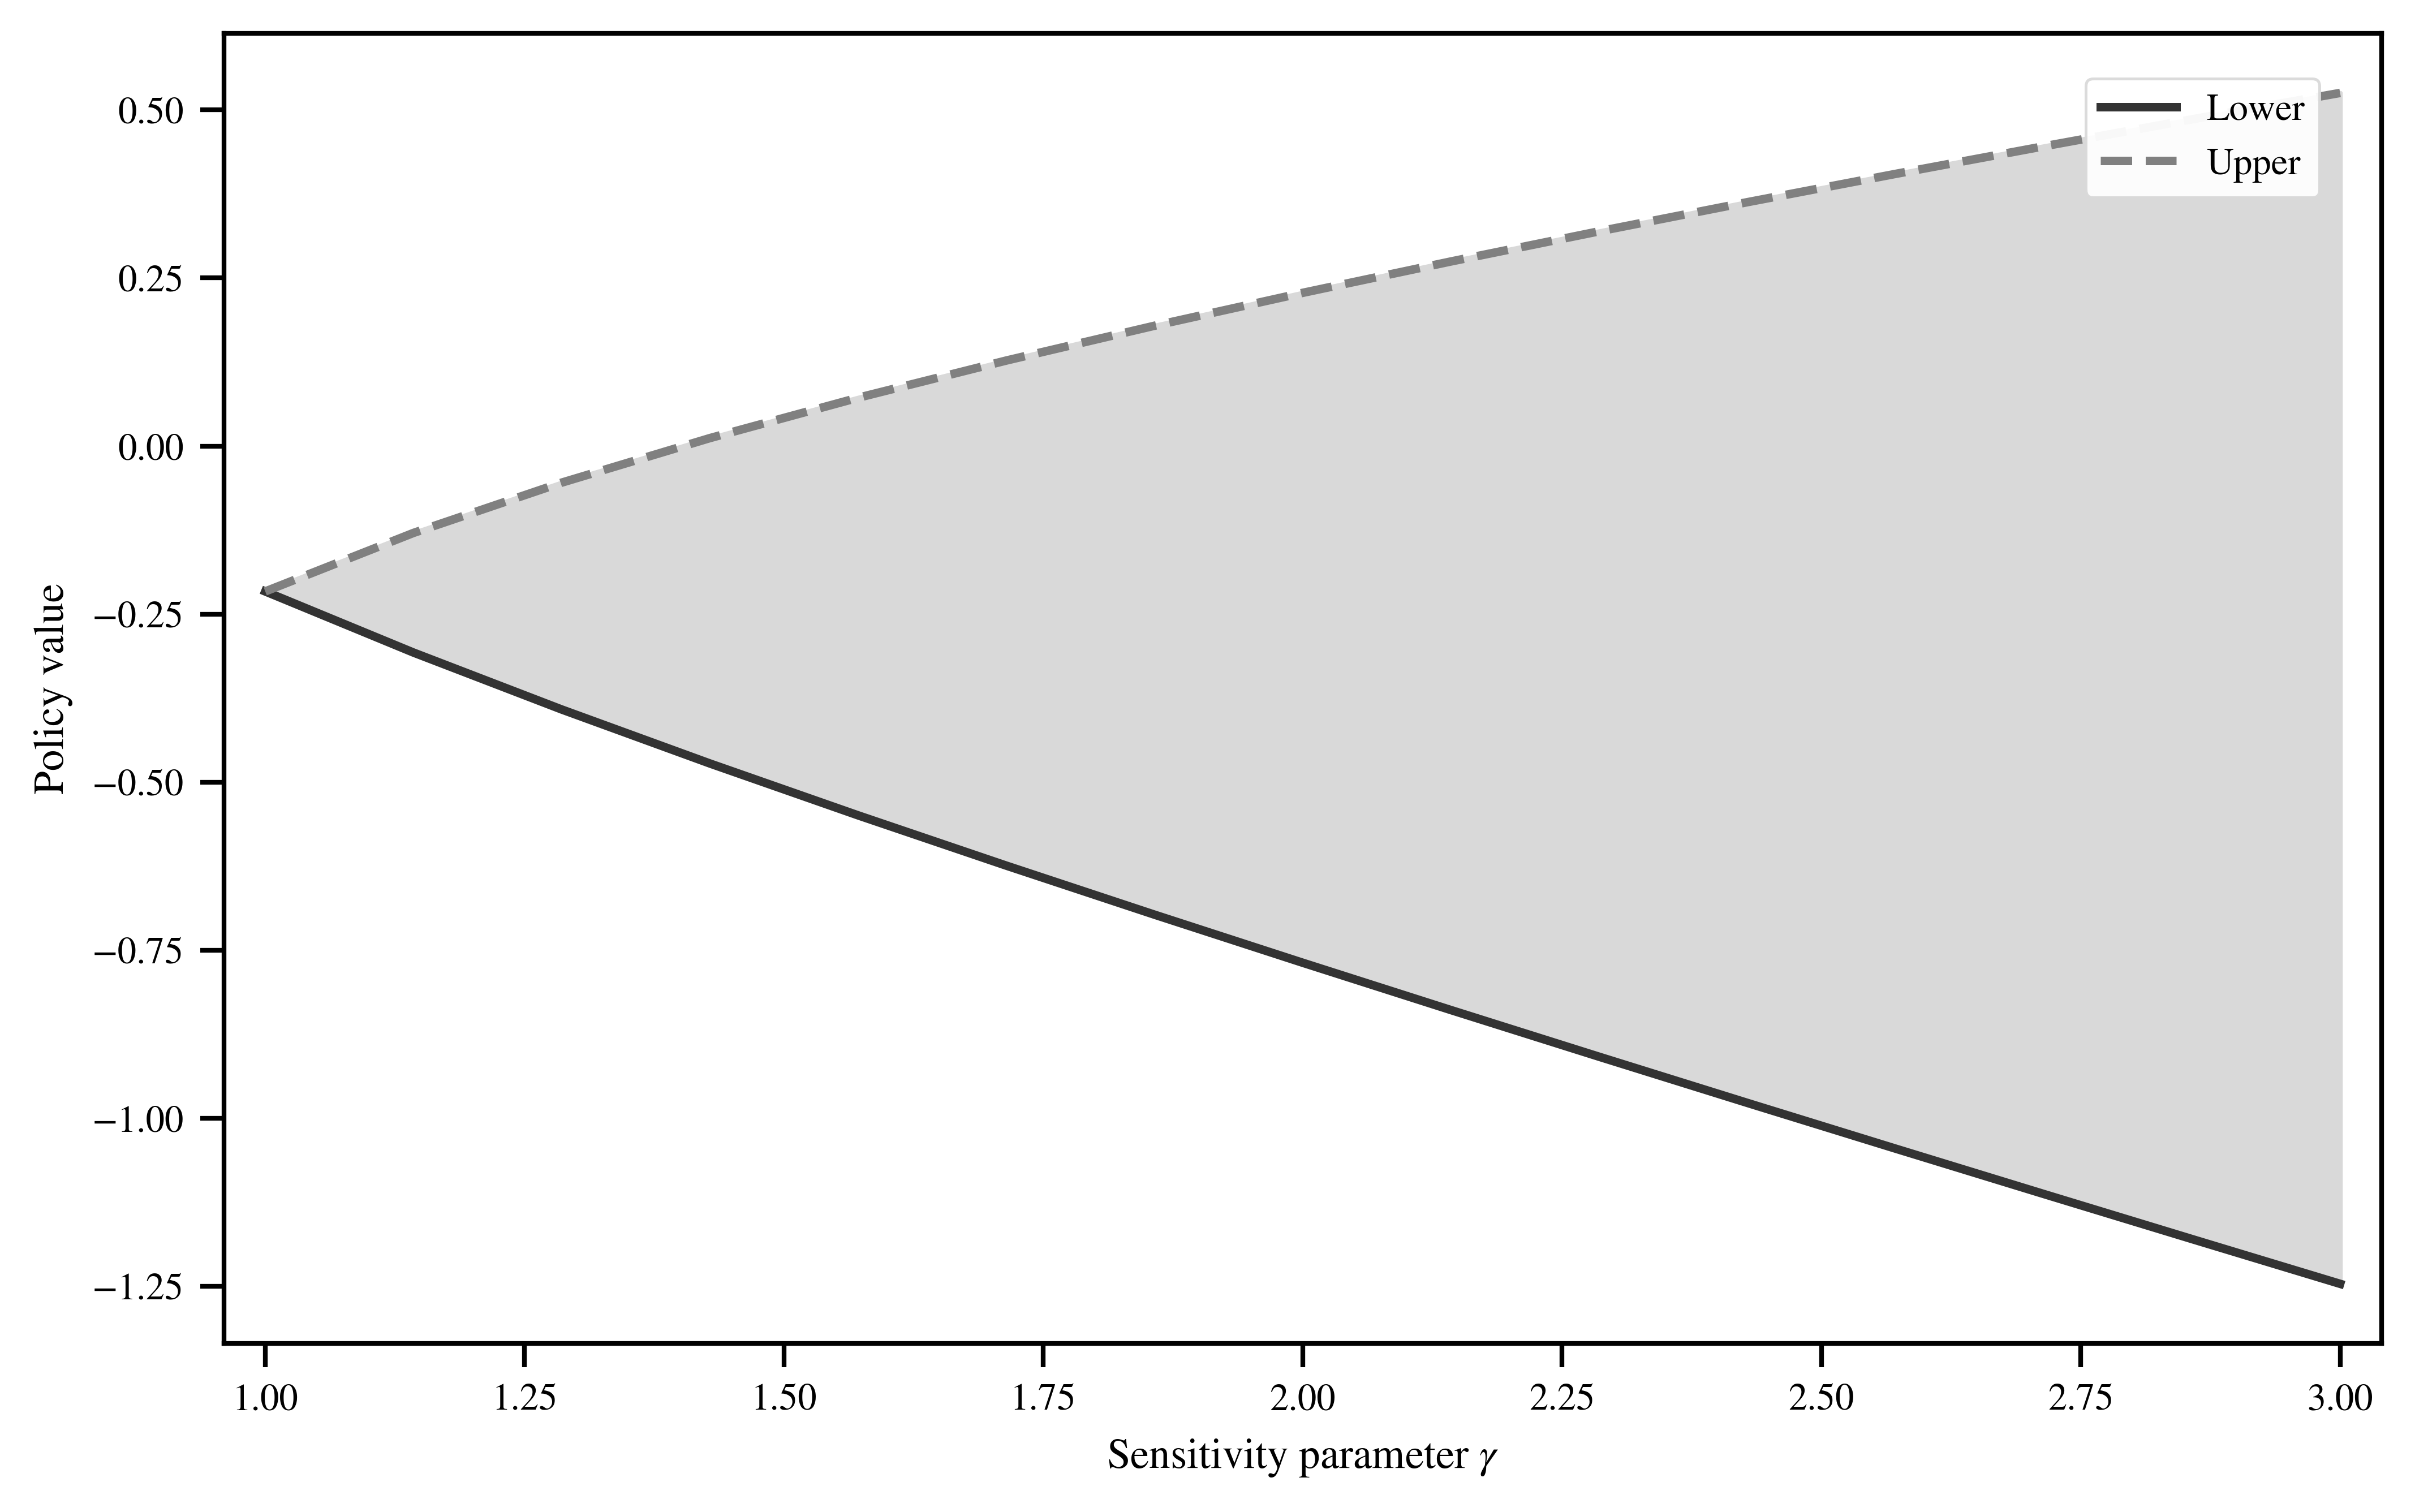

In [3]:
gammas = np.linspace(1.0, 3.0, 15)
bounds = sensitivity_bounds(dataset, benchmark.target_policy, gammas)
isinstance(bounds, SensitivityBounds)

bounds_df = pd.DataFrame(
    {"gamma": bounds.gammas, "lower": bounds.lower, "upper": bounds.upper}
)
print(bounds_df.head().round(3).to_string(index=False))
bounds_df.head()

fig = plot_sensitivity_curve(
    [
        {"gamma": g, "lower": lo, "upper": up}
        for g, lo, up in zip(bounds.gammas, bounds.lower, bounds.upper)
    ]
)
fig

## Estimand-based sensitivity curve

The class-based interface ties bounds to an explicit estimand with bounded
confounding assumptions.

In [ ]:
estimand = PolicyValueEstimand(
    policy=benchmark.target_policy,
    discount=1.0,
    horizon=1,
    assumptions=AssumptionSet([SEQUENTIAL_IGNORABILITY, OVERLAP, BOUNDED_CONFOUNDING]),
)

bandit_sensitivity = BanditPropensitySensitivity(estimand)
curve = bandit_sensitivity.curve(dataset, gammas)
curve.to_dict(), isinstance(curve, SensitivityCurve)

In [ ]:
print(
    "Gamma=1.0 bounds: "
    f"[{curve.lower[0]:.3f}, {curve.upper[0]:.3f}]"
)

In [4]:
output_dir = Path("docs/assets/figures")
output_dir.mkdir(parents=True, exist_ok=True)
save_figure(fig, output_dir / "sensitivity_bandits_curve")

{'pdf': 'docs/assets/figures/sensitivity_bandits_curve.pdf',
 'png': 'docs/assets/figures/sensitivity_bandits_curve.png'}